In [1]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from matplotlib import font_manager, rc
import platform
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# 그래픽 출력을 조금 더 고급화하기 위한 라이브러리
import seaborn as sns

#과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats
# 사이킷런 ≥0.20 필수 : 0.20에서 데이터 변환을 위한 Transformer클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 데이터를 분할할 때 동일한 분할을 만들기 위해서
# 모델을 만드는 작업을 여러 번에 걸쳐서 하는 경우 시드가 변경이 되서 훈련용 데이터가
# 자주 변경이 되면 결국 모든 데이터를 가지고 모델을 생성하는 결과
# Overfit이 될 가능성이 높아짐
np.random.seed(42)


## 선형 회귀

### 정규 방정식

In [8]:
# 샘플 데이터 생성
# np.random.rand(100, 1)을 해주는 이유는 잡음을 생성하기 위해서
# 너무 정확한 기울기와 절편이 주어져서 잡음을 섞었음

X = 2 * np.random.rand(100, 1) # 100개의 독립 변수를 생성
y = 4 + 3 * X + np.random.randn(100, 1) # 100개의 종속 변수를 생성

# 모든 샘플에 1을 추가
X_b = np.c_[np.ones((100, 1)), X]
# 역행렬을 구하고(inv) 행렬 곱셈(dot)을 수행
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best) # 잡음 때문에 정확히 4와 3은 나오지 않음

[[3.768]
 [3.233]]


In [9]:
# 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.768]
 [10.233]]


### 보스톤 주택 가격 예측 - 선형 회귀

In [14]:
# 데이터 가져오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data)
print(target)

[[6.320e-03 1.800e+01 2.310e+00 ... 1.530e+01 3.969e+02 4.980e+00]
 [2.731e-02 0.000e+00 7.070e+00 ... 1.780e+01 3.969e+02 9.140e+00]
 [2.729e-02 0.000e+00 7.070e+00 ... 1.780e+01 3.928e+02 4.030e+00]
 ...
 [6.076e-02 0.000e+00 1.193e+01 ... 2.100e+01 3.969e+02 5.640e+00]
 [1.096e-01 0.000e+00 1.193e+01 ... 2.100e+01 3.934e+02 6.480e+00]
 [4.741e-02 0.000e+00 1.193e+01 ... 2.100e+01 3.969e+02 7.880e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.

In [15]:
bostonDF = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
bostonDF['PRICE'] = target
print(bostonDF.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


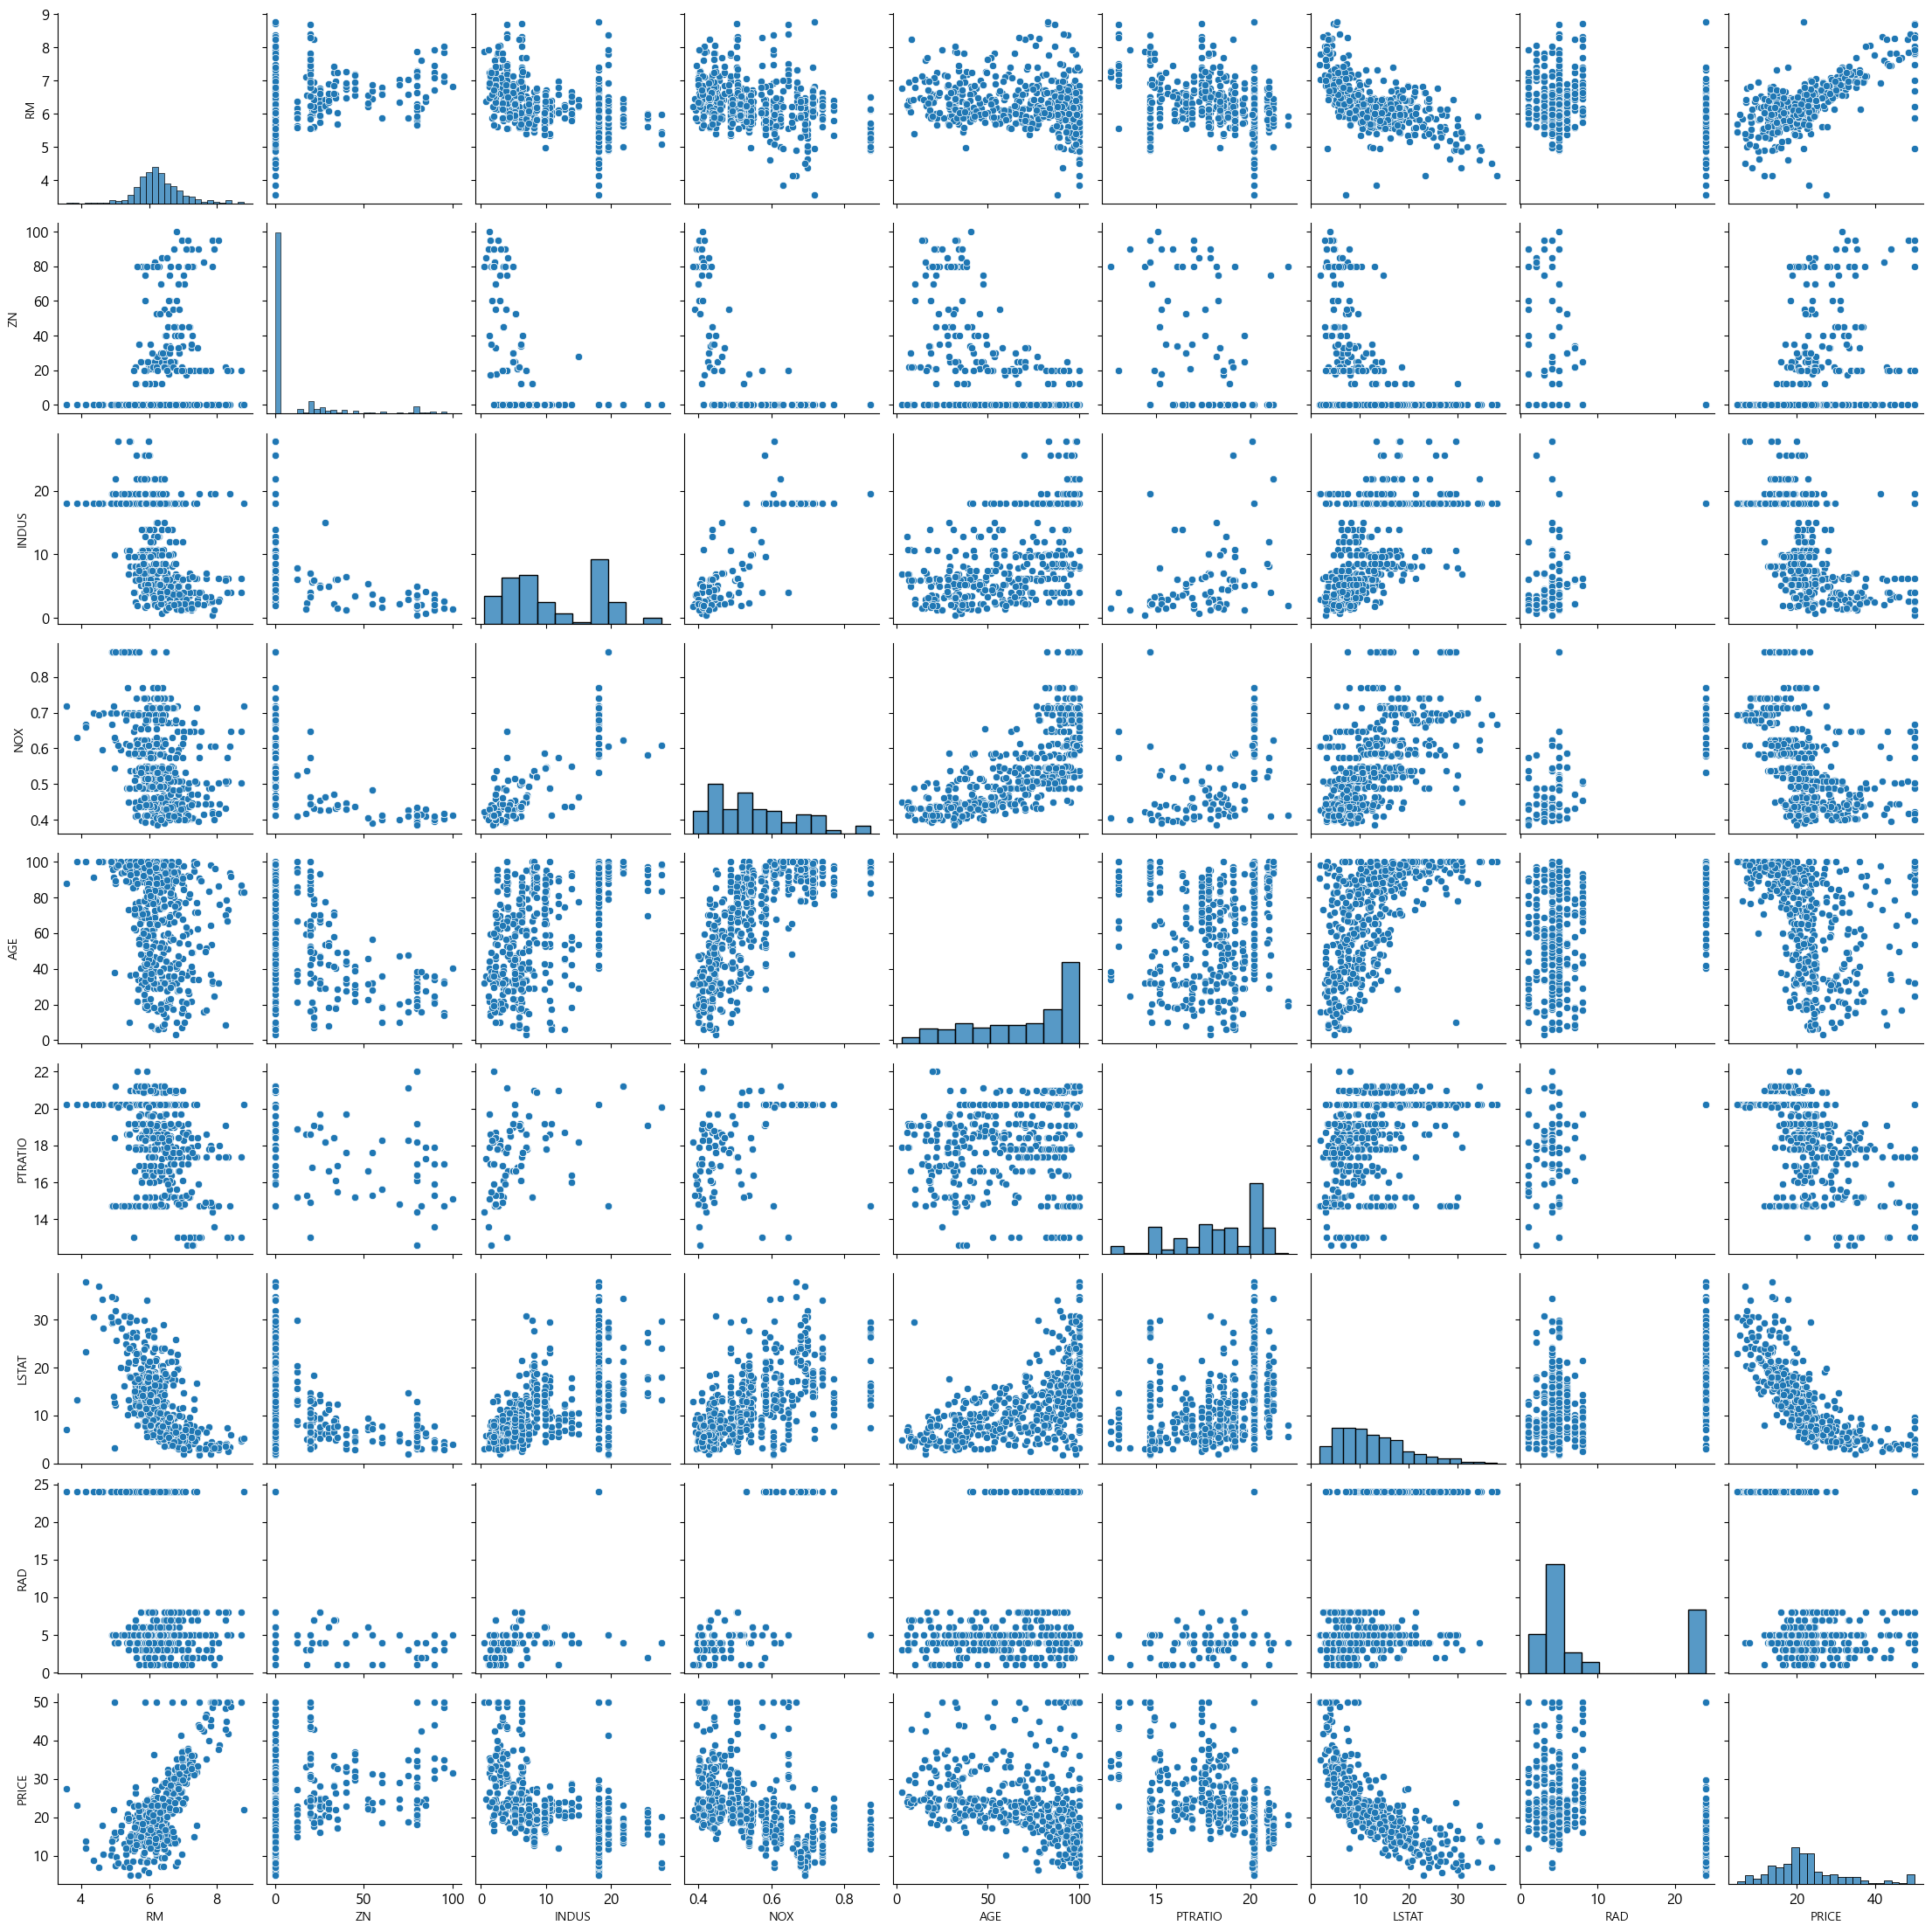

In [17]:
# 상관 관계를 파악하고자 하는 열의 리스트
cols = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD', 'PRICE']
bostonDF[cols].corr()

sns.pairplot(bostonDF[cols], height=2.5)
plt.show()

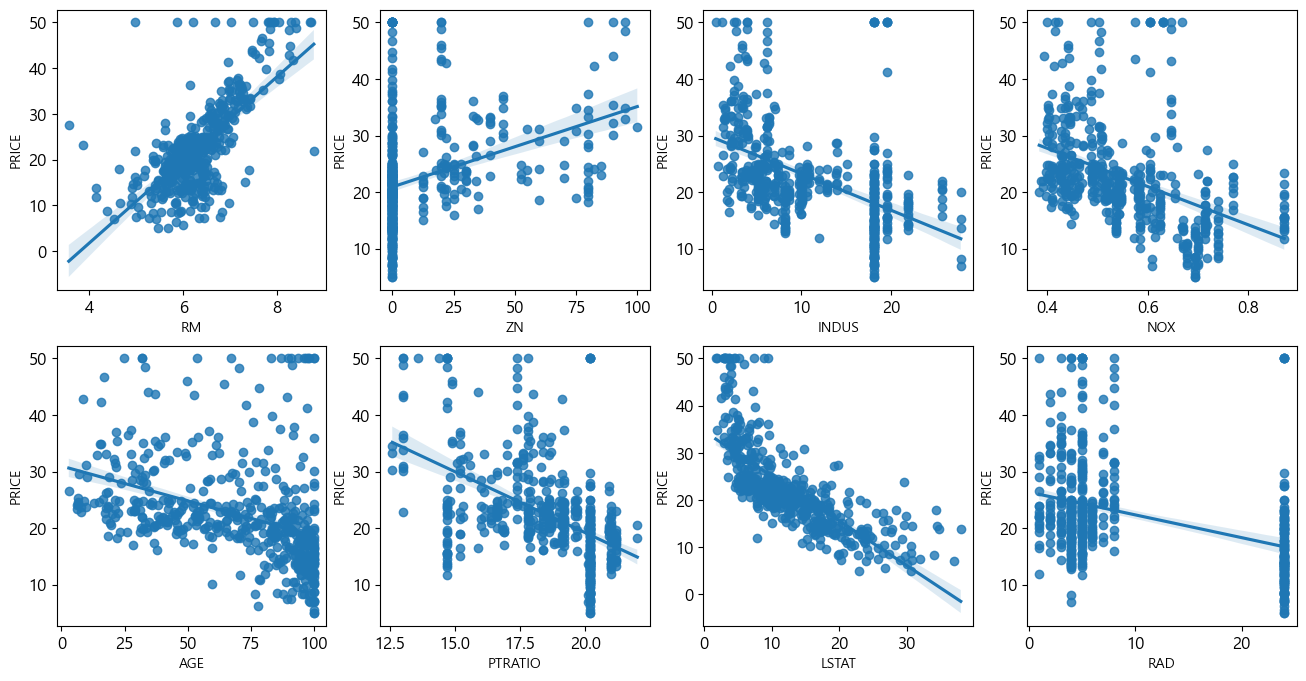

In [18]:
# y의 자리만 다른 컬럼 이름으로 수정하면 그 컬럼과의 상관 관계를 파악하는 것이 가능
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD'] # PRICE는 뺌
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [19]:
# RM을 이용한 PRICE 예측 단변량 회귀
from scipy import stats
slope, intercept, r_value, p_value, stderr = stats.linregress(bostonDF['RM'], bostonDF['PRICE'])

print("기울기:", slope)
print("절편:", intercept)
print("상관계수", r_value)
print("불확실성 정도:", p_value)
print("방이 4개일 때 주택 가격:", 4 * slope + intercept)



기울기: 9.102108981180306
절편: -34.67062077643854
상관계수 0.695359947071539
불확실성 정도: 2.487228871008377e-74
방이 4개일 때 주택 가격: 1.7378151482826851


In [20]:
# sklearn을 이용한 단변량 회귀
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values
slr.fit(X, y)

print('기울기: ',  slr.coef_[0])
print('절편: ' , slr.intercept_)


기울기:  9.10210898118031
절편:  -34.67062077643857


In [21]:
# RANSAC 방법을 이용한 회귀
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error', 
                         residual_threshold=5.0, 
                         random_state=42)
ransac.fit(X, y)
print('기울기: ', ransac.estimator_.coef_[0])
print('절편: ' , ransac.estimator_.intercept_)

기울기:  9.52017496724595
절편:  -36.492768109126345


## MSE와 R2를 이용한 성능 평가

In [23]:
from sklearn.model_selection import train_test_split

# 성능 평가를 위해서 sklearn을 이용한 단변량 회귀 다시 수행(위의 코드와 동일함)
X = bostonDF[['RM']].values
y = bostonDF['PRICE'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

slr = LinearRegression()

slr.fit(X_train, y_train)

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)


In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('훈련 MSE:, 테스트 MSE: ', (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

print('훈련 R^2:, 테스트 R^2: ' , (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE:, 테스트 MSE:  (45.01275449524406, 40.35144969787305)
훈련 R^2:, 테스트 R^2:  (0.4878892853275991, 0.4584649934303068)
